In [1]:
import pandas as pd
import os

In [238]:
data_path = '/Users/subashkhanal/Desktop/MLforAlzheimers/data/ADNI/genetics/final/'
#stats_path = '/Users/subashkhanal/Desktop/MLforAlzheimers/data/ADNI/genetics/stats'

In [254]:
os.listdir(data_prep_path)

['t_test_geneExpr_Unfiltered.csv',
 '.DS_Store',
 'Bothfiltered_gene_expr_dx.csv',
 'GeneExpr_brain_feat.csv',
 't_test_geneExpr_Bothfiltered.csv',
 'Unfiltered_gene_expr_dx.csv',
 't_test_geneExpr_Probefiltered.csv',
 'gene_probe_map.csv',
 'Probfiltered_gene_expr_dx.csv']

In [300]:
df0 = pd.read_csv(os.path.join(data_path,'Unfiltered_gene_expr_dx.csv'),low_memory=False)
df1 = pd.read_csv(os.path.join(data_path,'Probfiltered_gene_expr_dx.csv'),low_memory=False)
df2 = pd.read_csv(os.path.join(data_path,'Bothfiltered_gene_expr_dx.csv'),low_memory=False)
tf0 = pd.read_csv(os.path.join(data_path,'t_test_geneExpr_Unfiltered.csv'),low_memory=False)
tf1 = pd.read_csv(os.path.join(data_path,'t_test_geneExpr_Probefiltered.csv'),low_memory=False)
tf2 = pd.read_csv(os.path.join(data_path,'t_test_geneExpr_Bothfiltered.csv'),low_memory=False)
my_map = pd.read_csv(os.path.join(data_path,'gene_probe_map.csv'),low_memory=False)

In [231]:
# gene_probe_map = df.loc[32:,['PTID','Gene']]
# import numpy as np
# unlabeled_probes = np.where(pd.isnull(gene_probe_map))[0]
# print(len(unlabeled_probes))
# for probe in unlabeled_probes:
#     gene_probe_map.at[probe,'Gene'] = gene_probe_map.iloc[probe].PTID
#     #print(gene_probe_map.at[probe,'Gene'])
# len(np.where(pd.isnull(gene_probe_map))[0])

In [292]:
classes.split('_')

['CN', 'AD']

In [303]:
classes = ['CN_Dementia', 'CN_MCI','MCI_Dementia']
feat_types = ['Unfiltered', 'Probfiltered','Bothfiltered']
for c in classes:
    for f in feat_types:
        df = pd.read_csv(os.path.join(data_path,f+'_gene_expr_dx.csv'),low_memory=False)
        my_df = df[(df['DX'] == c.split('_')[0]) | (df['DX'] == c.split('_')[1])]
        my_df.to_csv(os.path.join(data_path, f+'_'+c+'.csv'))
        print(c,f,Counter(my_df['DX']))



CN_Dementia Unfiltered Counter({'CN': 244, 'Dementia': 113})
CN_Dementia Probfiltered Counter({'CN': 244, 'Dementia': 113})
CN_Dementia Bothfiltered Counter({'CN': 118, 'Dementia': 56})
CN_MCI Unfiltered Counter({'MCI': 377, 'CN': 244})
CN_MCI Probfiltered Counter({'MCI': 379, 'CN': 244})
CN_MCI Bothfiltered Counter({'MCI': 197, 'CN': 118})
MCI_Dementia Unfiltered Counter({'MCI': 377, 'Dementia': 113})
MCI_Dementia Probfiltered Counter({'MCI': 379, 'Dementia': 113})
MCI_Dementia Bothfiltered Counter({'MCI': 197, 'Dementia': 56})


In [304]:
os.listdir(data_prep_path)

['t_test_geneExpr_Unfiltered.csv',
 'Unfiltered_MCI_Dementia.csv',
 '.DS_Store',
 'Bothfiltered_gene_expr_dx.csv',
 'GeneExpr_brain_feat.csv',
 't_test_geneExpr_Bothfiltered.csv',
 'Unfiltered_gene_expr_dx.csv',
 't_test_geneExpr_Probefiltered.csv',
 'Bothfiltered_MCI_Dementia.csv',
 'Probfiltered_CN_MCI.csv',
 'gene_probe_map.csv',
 'Unfiltered_CN_Dementia.csv',
 'Unfiltered_CN_MCI.csv',
 'Probfiltered_gene_expr_dx.csv',
 'Bothfiltered_CN_Dementia.csv',
 'Bothfiltered_CN_MCI.csv',
 'Probfiltered_CN_Dementia.csv',
 'Probfiltered_MCI_Dementia.csv']

In [108]:
stat_test = pd.read_csv(os.path.join(stats_path,'t_test_geneExpr_Probefiltered.csv'))
full = 200
partial = 50
portion = full

In [113]:
top_AD_CN = stat_test.sort_values(by=['AD_CN_c']).iloc[0:portion]['Unnamed: 0']
top_AD_MCI = stat_test.sort_values(by=['AD_MCI_c']).iloc[0:portion]['Unnamed: 0']
top_CN_MCI = stat_test.sort_values(by=['CN_MCI_c']).iloc[0:portion]['Unnamed: 0']

In [114]:
top_AD_CN 

4818        NSMAF
10597        FLT3
1223       ANP32B
11412       BCL7A
2804         CD63
           ...   
4458        PTGDS
2905         TDP1
6443        ITGB2
1089        MLLT3
2751     KIAA0319
Name: Unnamed: 0, Length: 200, dtype: object

In [115]:
df_CN = df[df['DX']=='CN']
df_AD = df[df['DX']=='Dementia']
df_MCI = df[df['DX']=='MCI']

In [117]:
class1 = df_CN[['AGE','PTGENDER','APOE4','DX']+list(top_AD_CN)]
class2 = df_AD[['AGE','PTGENDER','APOE4','DX']+list(top_AD_CN)]


KeyError: "['EGLN1', 'RNF166', 'PYGL', 'S100A12', 'CYP4F3 || CYP4F2', 'NFE4', 'HDAC4', 'DOCK5', 'RNF24', 'PIK3C2B', 'ANKRD22', 'TMEM156', 'SLC25A44', 'MAPK14', 'KCNH7', 'ELP6', 'MBD6', 'LOC101929373 || SLC9B1', 'MMP9', 'RFTN1', 'P2RY10', 'RCN3', 'GID8', 'LOC254896', 'IGHV5-78', 'GCM1', 'FKBP5', 'FCRL1', 'FCHSD2', 'CYP4F3', 'NR4A1', 'DBP', 'C1ORF56', 'PRCP', 'KIAA0319', 'IQCK', 'QPCT', 'CDKN1C', 'NAB2', 'TSC22D4', 'DECR1', 'CPD', 'ASB2', 'MXD3', 'LINC00482', 'SULT1B1', 'MIR600HG', 'SH3GLB1', 'POLA1', 'PATZ1', 'FLT3', 'CYP4F2', 'TSPAN13', 'SLC12A2', 'AFF3', 'CD177', 'LTB4R', 'NFIL3', 'VMP1', 'C19ORF59', 'NAIP', 'EMD', 'SNX29P2', 'DUSP5', 'HPSE', 'CDCA7L', 'CTBP2', 'ALOX5AP', 'TMBIM6', 'HECW2', 'S100A11', 'WLS', 'LAT2', 'CD63', 'FBXL13', 'ODC1', 'KAZN', 'VAMP3', 'LINC01000', 'MLLT3', 'EBF1', 'CCNB1IP1', 'FAM129C', 'TRNP1', 'SERPINB8', 'ANXA3', 'TXNRD1', 'NBEAL2', 'TDP1', 'PANX2', 'SLC26A8', 'GPRC5B', '1-Mar', 'LHFPL2', 'CD46', 'CLEC4E', 'CKB', 'TRIM34', 'RBMS1', 'ABHD12B', 'PADI4', 'MIS18A', 'KCNE1', 'DGAT2', 'ENSG00000211625 || ENSG00000239951', 'CD79A', 'LTBR', 'TPPP3', 'TYROBP', 'KREMEN1', 'MSRB1', 'PMEPA1', 'ZC3H12D', 'NCF1B', 'TMEM144', 'TPST1', 'TRIM25', 'CKAP4', 'LRRC4', 'SLC6A6', 'E2F3', 'NCF2', 'ASAP1', 'METTL20', 'PTPRE', 'RTN3', 'LOC101929809 || LILRB3', 'BCL7A', 'BCL6', 'BCL11A', 'UBR2', 'CD72', 'TRIB2', 'NSMAF', 'SEL1L', 'ENSG00000211899 || ENSG00000233855', 'TENM1', 'RFESD', 'ADARB1', 'ICAM3', 'VNN3', 'IL1R2', 'TDRKH', 'SUSD3', 'LMNB1', 'CCNE1', 'HAL', 'LACTB', 'RAB30', 'PELO', 'LILRB3', 'APOL4', 'USP4', 'BPI', 'RFWD2', 'HIP1R', 'FXYD6', 'BLNK', 'TCF3', 'STX3', 'ZNF251', 'TCL1A', 'DNAH11', 'LSMEM1', 'NMI', 'MAFG', 'MYBPC3', 'RNF130', 'ENSG00000241351', 'HBEGF', 'TLR8', 'CBS', 'LILRA2', 'CLIC1', 'CD22', 'IRAK3', 'UBXN1', 'STMN1', 'MPZL3', 'MS4A1', 'DPYD', 'CREB5', 'PTGDS', 'FCGR3A', 'CARD6', 'ZNF703', 'IGSF6', 'STAP1', 'FOSL2', 'PLBD1', 'PPP1R3D', 'ROPN1L', 'TMEM41A', 'TREML4', 'ANP32B', 'ITGB2', 'SLC22A1', 'ACSL1', 'DYSF', 'GPER1'] not in index"

In [82]:
overall_df = pd.concat([class1, class2], axis=0)

In [83]:
overall_df.shape

(490, 204)

In [84]:
y = overall_df['DX']

In [85]:
X = overall_df.drop(columns = ['DX'])

In [86]:
X['PTGENDER'] = X['PTGENDER'].astype('category').cat.codes

In [87]:
X.shape, y.shape

((490, 203), (490,))

In [88]:
#X = X.drop(columns = ['AGE','PTGENDER','APOE4']) #do not use extra

In [89]:
X.head()

PTID,AGE,PTGENDER,APOE4,11719922_a_at,11747156_x_at,11739565_a_at,11716149_a_at,11728500_a_at,11740108_a_at,11750247_x_at,...,11745459_a_at,11756587_a_at,11758462_s_at,11734802_x_at,11731577_a_at,11754915_a_at,11718066_a_at,11763417_a_at,11744282_at,11720266_a_at
099_S_4205,81.4,0,0,4.183,4.868,4.996,6.02,8.318,6.224,3.244,...,5.572,7.085,3.054,7.173,7.07,7.355,4.091,5.644,10.692,6.235
007_S_4467,61.9,0,2,3.857,4.161,4.864,5.291,7.684,6.314,3.374,...,4.728,5.94,2.747,6.341,6.102,7.267,2.889,4.782,10.145,6.52
003_S_2374,81.3,0,0,4.408,4.461,5.546,4.827,8.773,5.582,3.475,...,5.429,5.949,2.95,6.14,6.642,7.116,3.413,5.393,10.328,5.711
098_S_4059,71.9,1,2,3.603,4.466,5.588,4.784,8.63,6.21,3.927,...,5.156,7.566,3.288,6.302,7.139,7.523,3.77,5.108,10.501,5.781
031_S_2018,76.4,0,0,4.005,4.501,5.345,5.862,8.813,5.873,3.865,...,5.398,5.899,2.759,6.038,5.889,7.595,3.248,4.539,10.692,5.621


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [91]:
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
index_array = []
for train_ix, test_ix in kfold.split(X, y):
    
    fold_index = [train_ix,test_ix]
    index_array.append(fold_index)

    

In [92]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [93]:
import random
random.seed(30)
from imblearn.over_sampling import ADASYN, SMOTE
clf = RandomForestClassifier(n_estimators=200,random_state=30)
#clf = GradientBoostingClassifier(n_estimators=200,random_state=30)
tr_acc = []
ts_acc = []

for i in range(K):
    X_train, y_train = X[index_array[i][0]], y[index_array[i][0]]
    oversample = SMOTE(sampling_strategy=1.0, k_neighbors=7)
    X_train, y_train = oversample.fit_resample(X_train, y_train)  
    X_test, y_test = X[index_array[i][1]], y[index_array[i][1]]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_acc = (y_pred_train == y_train).sum()/len(y_train)
    test_acc = (y_pred_test == y_test).sum()/len(y_test)
    
    tr_acc.append(train_acc)
    ts_acc.append(test_acc)
    
print(np.array(tr_acc).mean(),np.array(ts_acc).mean())

# 1.0 0.7450312989045382 while including APOE4 feature
#When that is removed!

1.0 0.7551020408163265


In [94]:
from collections import Counter
Counter(y_test),Counter(y_pred_test)

(Counter({'MCI': 75, 'Dementia': 23}), Counter({'MCI': 83, 'Dementia': 15}))

In [95]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = y_pred_test
target_names = ['CN', 'AD']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          CN       0.47      0.30      0.37        23
          AD       0.81      0.89      0.85        75

    accuracy                           0.76        98
   macro avg       0.64      0.60      0.61        98
weighted avg       0.73      0.76      0.74        98



In [96]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true, y_pred)

0.5988405797101449

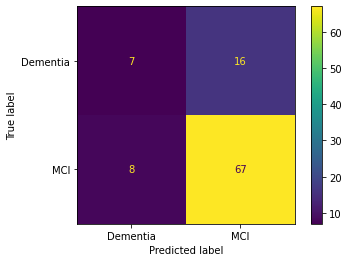

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  